In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# see https://en.wikipedia.org/wiki/Tree_of_primitive_Pythagorean_triples

def getPrimitiveTriples(limit):
    A = np.array([[2, 1, -1], [-2, 2, 2], [-2, 1, 3]], dtype=np.int32)
    B = np.array([[2, 1, 1], [2, -2, 2], [2, -1, 3]], dtype=np.int32)
    C = np.array([[2, -1, 1], [2, 2, 2], [2, 1, 3]], dtype=np.int32)
    primitives = []

    def triples(t):
        if t[2] > limit or t[1] > limit or t[0] > limit:
            return
        primitives.append(t)
        triples(A.dot(t))
        triples(B.dot(t))
        triples(C.dot(t))

    triples(np.array([3, 4, 5], dtype=np.int32))

    primitives = np.array(primitives)
    primitives.sort(axis=1)

    return primitives

In [3]:
limit = 10000
primitives = getPrimitiveTriples(limit)
# make all multiples
multiples = []
for t in primitives:
    for m in range(2, limit // t[2] + 1):
        multiples.append(t * m)
multiples = np.array(multiples)

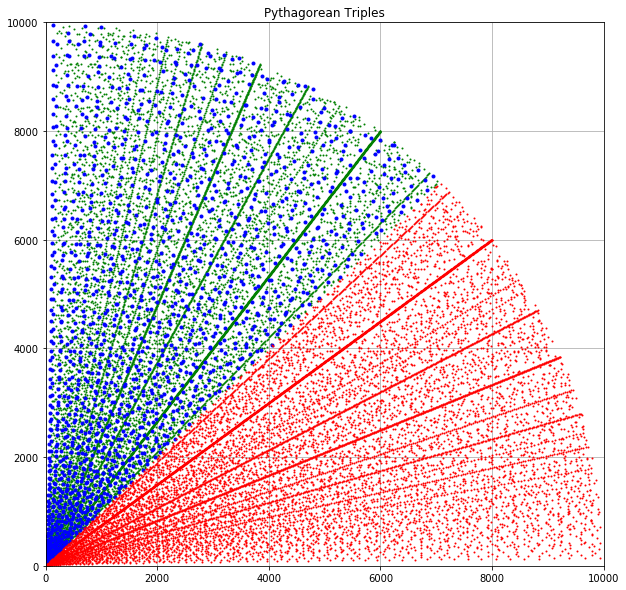

In [4]:
plt.figure(figsize=(10, 10))
plt.title("Pythagorean Triples")
plt.xlim(0, limit)
plt.ylim(0, limit)
plt.plot(np.array(multiples)[:, 0], np.array(multiples)[:, 1], ".g", ms=2)
plt.plot(np.array(primitives)[:, 0], np.array(primitives)[:, 1], "ob", ms=3)

#flip triples
h = np.concatenate((primitives, multiples), axis=0)
h[:, [0, 1]] = h[:, [1, 0]]
plt.plot(np.array(h)[:, 0], np.array(h)[:, 1], ".r", ms=2)

plt.grid(True, which='both')
plt.show()